## Importing Libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dropout,Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, load_model
import tensorflow as tf
import numpy as np
import os

Using TensorFlow backend.


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nbatch = 128

train_datagen = ImageDataGenerator( rescale = 1./255, 
                                  rotation_range = 10,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
train_gen = train_datagen.flow_from_directory('data/',
                                             target_size=(300,300),
                                             color_mode = 'grayscale',
                                             batch_size = nbatch,
                                             classes=['ADD','ZERO','ONE','TWO','THREE','FOUR','FIVE'],
                                             class_mode='categorical')


Found 9270 images belonging to 7 classes.


In [ ]:
test_gen = test_datagen.flow_from_directory('images/test',
                                           target_size=(300,300),
                                           color_mode='grayscale',
                                           batch_size=nbatch,
                                           classes=['ADD','ZERO','ONE','TWO','THREE','FOUR','FIVE'],
                                           class_mode='categorical')

In [ ]:
#Checking things aren't mixed up
train_gen.class_indices == test_gen.class_indices

In [75]:
import cv2
two = cv2.imread('TWO.png')

In [76]:
two = cv2.resize(two,(300,300))

In [67]:
model = Sequential()
model.add(Conv2D(3,(3,3),activation='relu',input_shape=two.shape))

In [77]:
two_batch = np.expand_dims(two,axis=0)

In [69]:
conv_two = model.predict(two_batch)

In [70]:
def visualize(two_batch):
    two = np.squeeze(two_batch,axis=0)
    print(two.shape)
    plt.imshow(two)

(298, 298, 3)


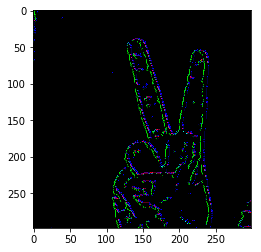

In [71]:
visualize(conv_two)

In [126]:
def visualize_nice(model,two):
    two_batch = np.expand_dims(two,axis=0)
    conv_two = model.predict(two_batch)
    conv_two = np.squeeze(conv_two,axis=0)
    print(conv_two.shape)
    conv_two = conv_two.reshape([149,149])
    #print(conv_two.shape)
    plt.imshow(conv_two)

In [127]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=two.shape))
model.add(MaxPooling2D(pool_size=(2,2)))

In [128]:
visualize_nice(model,two)

(149, 149, 32)


ValueError: cannot reshape array of size 710432 into shape (149,149)

In [ ]:
model = Sequential()
#Convolution Layer-1 32 Features,3X3 Matrix,Activation Function: relu
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(300,300,1)))
#2D Max Pooling 2X2 Matrix
model.add(MaxPooling2D((2,2)))
##Convolution Layer-1 64 Features,3X3 Matrix,Activation Function: relu
model.add(Conv2D(64, (3,3), activation='relu'))
#2D Max Pooling 2X2 Matrix
model.add(MaxPooling2D((2,2)))
#Convolution Layer-1 128 Features,3X3 Matrix,Activation Function: relu
model.add(Conv2D(128, (3,3), activation='relu'))
#2D Max Pooling 2X2 Matrix
model.add(MaxPooling2D((2,2)))
#Convolution Layer-1 128 Features,3X3 Matrix,Activation Function: relu
model.add(Conv2D(128, (3,3), activation='relu'))
#2D Max Pooling 2X2 Matrix
model.add(MaxPooling2D((2,2)))
#Flattening
model.add(Flatten())
#Fully Connected ANN
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

model.summary()

In [ ]:
model.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
callbacks_list = [EarlyStopping(monitor='val_loss',patience=10),
                 ModelCheckpoint(filepath='digit_model',monitor='val_loss',save_best_only=True),
                 ]

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [ ]:
with tf.device('/gpu:2'):
    history = model.fit_generator(train_gen, 
                                  steps_per_epoch = 10,
                                 epochs = 10,
                                 validation_data = test_gen,
                                 validation_steps = 28,
                                 callbacks=callbacks_list)